In [36]:
import sys
sys.path.append('/Users/aimeebarciauskas/Library/Python/3.6/lib/python/site-packages')
import psycopg2

conn = psycopg2.connect('dbname=ifsc')
query = "select previous_heat from bouldering_comp_results where comp_stage_rank = 1 and comp_stage = 'final';"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
previous_heat_final = list(map(lambda row: row[0], rows))

[4, 1]


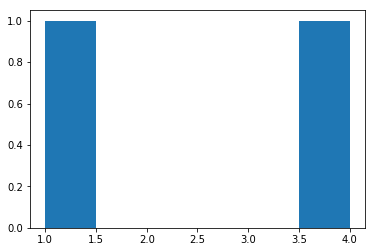

In [35]:
import matplotlib.pyplot as plt

plt.hist(previous_heat_final, bins=6)
plt.show()

In [39]:
query = "select previous_heat from bouldering_comp_results where comp_stage_rank = 1 and comp_stage = 'semifinal';"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
previous_heat_semifinal = list(map(lambda row: row[0], rows))

#plt.hist(previous_heat_semifinal)
#plt.show()

[None, None]

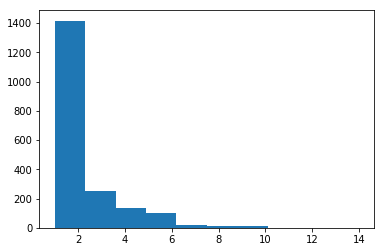

In [33]:
query = "select boulder_1_top_tries from bouldering_comp_results;"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
boulder_1_top_tries = list(filter(lambda x: x != None, map(lambda row: row[0], rows)))

plt.hist(boulder_1_top_tries)
plt.show()

In [46]:
query = """
select athletes.height, bouldering_comp_results.comp_stage_rank
from bouldering_comp_results join athletes on athletes.id = bouldering_comp_results.athlete_id
where athletes.height is not NULL and bouldering_comp_results.category = 'womens_bouldering';
"""

conn = psycopg2.connect('dbname=ifsc')
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
rows

[(159, 17),
 (159, 14),
 (163, 1),
 (163, 1),
 (163, 4),
 (163, 1),
 (164, 1),
 (164, 2),
 (162, 18),
 (162, 6),
 (162, 3),
 (162, 3),
 (162, 3),
 (160, 12),
 (160, 2),
 (160, 5),
 (160, 15),
 (163, 1),
 (163, 1),
 (163, 8),
 (163, 10),
 (163, 8),
 (164, 18),
 (164, 17),
 (153, 6),
 (153, 4),
 (165, 1),
 (165, 3),
 (165, 3),
 (165, 4),
 (165, 4),
 (165, 1),
 (165, 20),
 (165, 13),
 (163, 4),
 (163, 4),
 (163, 9),
 (166, 2),
 (166, 5),
 (166, 12),
 (155, 10),
 (174, 10)]